# Week 2: Predicting house prices

In this module, we focused on using regression to predict a continuous value (house prices) from features of the house (square feet of living space, number of bedrooms,...). We also built an iPython notebook for predicting house prices, using data from King County, USA, the region where the city of Seattle is located.

In this assignment, we are going to build a more accurate regression model for predicting house prices by including more features of the house. In the process, we will also become more familiar with how the Python language can be used for data exploration, data transformations and machine learning. These techniques will be key to building intelligent applications.

Learning outcomes
- Execute programs with the iPython notebook
- Load and transform real, tabular data
- Compute summaries and statistics of the data
- Build a regression model using features of the data

In [1]:
import graphlab

import matplotlib.pyplot as plt
%matplotlib inline

[WARNING] Unable to write current GraphLab Create license to /Users/jcj/.graphlab/config. Ensure that this user account has write permission to /Users/jcj/.graphlab/config to save the license for offline use.
[INFO] This non-commercial license of GraphLab Create is assigned to chengjun@chem.ku.dk and will expire on January 27, 2017. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-19663 - Server binary: /usr/local/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1454094383.log
[INFO] GraphLab Server Version: 1.8.1
[WARNING] Unable to create session in specified location: '/Users/jcj/.graphlab/artifacts'. Using: '/var/tmp/graphlab-jcj/19663/tmp_session_c9c27ebf-0083-4c08-bad3-cd2e93f68c64'


## Load data

In [2]:
sales = graphlab.SFrame("home_data.gl/")

## Explore data

In [103]:
sales_filtered = sales[(sales["sqft_living"]>2000) & (sales["sqft_living"] <=4000)]
print len(sales_filtered)
print len(sales)
print float(len(sales_filtered))/len(sales)

9118
21613
0.421875722945


In [7]:
graphlab.canvas.set_target("ipynb")
sales.show(view="Scatter Plot", x="sqft_living", y="price")

## Create a simple regression model

In [9]:
training_data, testing_data = sales.random_split(0.8, seed=0)

In [14]:
sqft_model = graphlab.linear_regression.create(training_data, target='price', features=['sqft_living'],validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 1.015003     | 4349521.926170     | 262943.613754 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


## Evaluate the model

In [17]:
print testing_data["price"].mean()

543054.042563


In [19]:
print sqft_model.evaluate(testing_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}


## Visualize the predictions

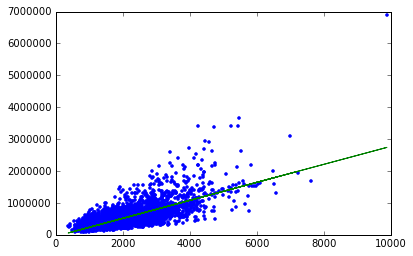

In [25]:
plt.plot(testing_data['sqft_living'],testing_data['price'],'.',
        testing_data['sqft_living'],sqft_model.predict(testing_data),'-')

In [27]:
sqft_model.get("coefficients")

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


## Build a more elaborate model: more features

In [107]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
#sales[my_features].show()

advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

print advanced_features

advanced_features_model = graphlab.linear_regression.create(training_data,target='price',features=advanced_features,validation_set=None)
print advanced_features_model.evaluate(testing_data)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 18
PROGRESS: Number of unpacked features : 18
PROGRESS: Number of coefficients    : 127
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.042353     | 3469012.450686     | 154580.940736 |
PROGRESS: +-----------+----------+--------------+----------

In [ ]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')
houses = sales[sales["zipcode"]=="98039"]

In [31]:
my_features_model = graphlab.linear_regression.create(training_data,target='price',features=my_features,validation_set=None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 115
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.030431     | 3763208.270523     | 181908.848367 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [33]:
print sqft_model.evaluate(testing_data)
print my_features_model.evaluate(testing_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}
{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}


In [34]:
house1 = sales[sales['id']=='5309101200']
print house1['price']
print sqft_model.predict(house1)
print my_features_model.predict(house1)

[620000, ... ]
[629584.8197281545]
[721918.9333272863]
